# TEMA 1
## DIMOFTE CRISTINA
### Analiza Datelor Complexe

## 1.   Importing Libraries
## 2.   Reading Data
## 3.   Exploration of Data
## 4.   Data processing
## 5.   Text Normalization
## 6.   Regex
## 7.   Document Term Matrix
## 8.   WordCloud



## 1. Importing Libraries


In [ ]:
!pip install contractions
import pandas as pd
import numpy as np

# DTM (document-term-matrix)
from sklearn.feature_extraction.text import CountVectorizer

# Impartirea documentului in cuvinte
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Grafice
import matplotlib.pyplot as plt

# WordCloud
from wordcloud import WordCloud

# Forme scurte (contractions)
import contractions

# cuvinte comune (stopwords)
nltk.download('stopwords')
from nltk.corpus import stopwords

# lemmatization (eliminarea pluralui / derivatelor cuvantului)
import spacy
nlp = spacy.load('en_core_web_sm')

# regex
import re

## 2. Reading Data

In [ ]:
url = 'https://github.com/berinde/curs-analiza-datelor-complexe/blob/main/data/input/1.input_data.csv?raw=True'
reviews = pd.read_csv(url)
reviews.head()

## 3. Exploration of data

In [ ]:
reviews.dtypes

In [ ]:
reviews.describe(include='all')

In [ ]:
reviews['rating'].value_counts()

In [ ]:
reviews['rating'].value_counts().sort_index()

In [ ]:
reviews['rating'].value_counts().sort_index().plot(kind='bar')

In [ ]:
fig = reviews['rating'].value_counts().sort_index().plot(kind='bar')

fig.set_title('Frecventa rating-urilor')
fig.set_xlabel('Rating')
fig.set_ylabel('Frecventa')

In [ ]:
print(reviews.dtypes)
reviews['rating'] = reviews['rating'].astype(int)
print(reviews.dtypes)

In [ ]:
reviews.head()

In [ ]:
reviews.iloc[0, 1]

In [ ]:
reviews['text'].iloc[1]

In [ ]:
reviews['text'][1]

In [ ]:
reviews.iloc[82, 1]

In [ ]:
reviews[82:83]

In [ ]:
# numarul de caractere din recenzia 301
len(reviews.iloc[82, 1])

In [ ]:
reviews['nr_caractere'] = reviews['text'].apply(len)
reviews.head()

In [ ]:
reviews['nr_caractere'].describe()

## 4. Data processing

In [ ]:
# Creez un dataframe cu toate recenziile care au rating 3
reviews[reviews['rating']==3]

In [ ]:
print(len(reviews))
# Elimin recenziile cu rating = 3
reviews = reviews[reviews['rating']!=3].reset_index(drop=True)
print(len(reviews))

In [ ]:
# Adaugam coloana negative, care are valoarea 1 daca rating-ul este <3 (1, 2)
# si valoarea 0 daca rating-ul este >3 (4,5)
reviews['negative'] = np.where(reviews['rating']<3, 1, 0)
reviews.tail(6)

,rest_id,text,rating,nr_caractere,positive,negative
9359,8fBmyHKbrqCDLD9at83EgQ,Probably the best Salsitas in the valley. The ...,5,182,0,0
9360,8fBmyHKbrqCDLD9at83EgQ,My family had a bad experience before here wit...,1,647,1,1
9361,8fBmyHKbrqCDLD9at83EgQ,Again blows everyone outa the water best Calif...,5,119,0,0
9362,8fBmyHKbrqCDLD9at83EgQ,I am in college and love coming to this place....,5,157,0,0
9363,8fBmyHKbrqCDLD9at83EgQ,This place offers some of the best tacos. Alwa...,5,488,0,0
9364,-g28gT1L7LlDKyXYrusI6Q,"Delicious meal, fast quick service, looked ver...",5,128,0,0


In [ ]:
reviews['negative'].describe()

,negative
count,9365.000000
mean,0.303150
std,0.459644
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
print('Nr. de recenzii pozitive', len(reviews[reviews['positive']==0]))
print('Nr. de recenzii negative', len(reviews[reviews['positive']==1]))

Nr. de recenzii pozitive 6526
Nr. de recenzii negative 2839


In [ ]:
reviews['negative'].value_counts()

,count
negative,
0,6526
1,2839


## 5. Text Normalization

# Text Normalization
*   voi converti textul in text scris cu litera mica
*   voi folosi contractions (don't -> do not)
*   voi imparti documentul in cuvinte (tokenization)
*   voi inlatura cuvintele comune (stopwords: the, a, to, etc.)
*   voi reduce cuvantul la lema (lemmatization)







In [ ]:
recenzie_test = reviews['text'].iloc[9360]
recenzie_test

"My family had a bad experience before here with the food, but I thought that I would give them a try tonight since I was craving carne asada nachos with my brother. Honestly I didn't know one could make nachos taste as bad as they did. There was barley any meat to begin with, it was mostly chunks of fat. We couldn't even get half way through it. The meat was flavorless, beans had no flavor, there sour cream and guacamole are super runny. My brother eats just about anything, and he couldn't keep eating it as well. To top it all of the service was horrible. Definitely a first and last for me. Only thing that was good was their Aguas frescas."

In [ ]:
# Convertesc textul in text scris cu litera mica
text_procesat = recenzie_test.lower()
text_procesat

"my family had a bad experience before here with the food, but i thought that i would give them a try tonight since i was craving carne asada nachos with my brother. honestly i didn't know one could make nachos taste as bad as they did. there was barley any meat to begin with, it was mostly chunks of fat. we couldn't even get half way through it. the meat was flavorless, beans had no flavor, there sour cream and guacamole are super runny. my brother eats just about anything, and he couldn't keep eating it as well. to top it all of the service was horrible. definitely a first and last for me. only thing that was good was their aguas frescas."

In [ ]:
# Contractions
contractions.fix("can't won't don't cannot doesn't")

'cannot will not do not cannot does not'

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Impart recenzia (document) in cuvinte
text_procesat_2 = nltk.word_tokenize(text_procesat)
text_procesat_2[0:5]

['my', 'family', 'had', 'a', 'bad']

In [ ]:
# Creez o lista cu cuvintele comune
cuv_comune = stopwords.words('english')
print(len(cuv_comune))
cuv_comune[0:10]

198


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [ ]:
# Inlatur cuvintele comune din text_procesat_2
print(len(text_procesat_2))
text_procesat_3 = [element for element in text_procesat_2 if element not in cuv_comune]
print(len(text_procesat_3))
text_procesat_3[0:5]

140
77


['family', 'bad', 'experience', 'food', ',']

In [ ]:
# Transform lista inapoi in propozitie
text_procesat_4 = " ".join(text_procesat_3)
text_procesat_4

"family bad experience food , thought would give try tonight since craving carne asada nachos brother . honestly n't know one could make nachos taste bad . barley meat begin , mostly chunks fat . could n't even get half way . meat flavorless , beans flavor , sour cream guacamole super runny . brother eats anything , could n't keep eating well . top service horrible . definitely first last . thing good aguas frescas ."

In [ ]:
# Reduc fiecare cuvant la lema sa
text_procesat_5 = " ".join([word.lemma_ for word in nlp(text_procesat_4)])
text_procesat_5

'family bad experience food , thought would give try tonight since crave carne asada nachos brother . honestly not know one could make nachos taste bad . barley meat begin , mostly chunk fat . could not even get half way . meat flavorless , bean flavor , sour cream guacamole super runny . brother eat anything , could not keep eat well . top service horrible . definitely first last . thing good aguas frescas .'

In [ ]:
reviews.head()

,rest_id,text,rating,nr_caractere,positive,negative
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,0,0
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,0,0
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,0,0


In [ ]:
def preprocesare_text(document):
    # Convertesc textul in text scris cu litera mica
    document = document.lower()
    # Inlocuiesc formele scurte (contractions)
    document = contractions.fix(document)
    # Regex
    # ^ = NOT
    document = re.sub(r'[^\w\s]', ' ', document)
    document = re.sub(r'[^a-z ]', '', document)
    # Impart documentul in cuvinte (tokenization)
    document = word_tokenize(document)
    # Inlatur cuvintele comune (stopwords)
    cuv_comune = stopwords.words('english')
    document = [element for element in document if element not in cuv_comune]
    # Convertesc din lista de cuvinte in string
    document = " ".join(document)
    # Reduc cuvantul la lema sa (Lemmatization)
    document = " ".join([word.lemma_ for word in nlp(document)])

    return document

In [ ]:
print('Recenzia Initiala:', recenzie_test)
print('')
print('Recenzia Procesata:', preprocesare_text(recenzie_test))

Recenzia Initiala: My family had a bad experience before here with the food, but I thought that I would give them a try tonight since I was craving carne asada nachos with my brother. Honestly I didn't know one could make nachos taste as bad as they did. There was barley any meat to begin with, it was mostly chunks of fat. We couldn't even get half way through it. The meat was flavorless, beans had no flavor, there sour cream and guacamole are super runny. My brother eats just about anything, and he couldn't keep eating it as well. To top it all of the service was horrible. Definitely a first and last for me. Only thing that was good was their Aguas frescas.

Recenzia Procesata: family bad experience food thought would give try tonight since crave carne asada nachos brother honestly know one could make nachos taste bad barley meat begin mostly chunk fat could even get half way meat flavorless bean flavor sour cream guacamole super runny brother eat anything could keep eat well top serv

In [ ]:
reviews.head(10000)

,rest_id,text,rating,nr_caractere,positive,negative
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,0,0
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,0,0
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,0,0
...,...,...,...,...,...,...
9360,8fBmyHKbrqCDLD9at83EgQ,My family had a bad experience before here wit...,1,647,1,1
9361,8fBmyHKbrqCDLD9at83EgQ,Again blows everyone outa the water best Calif...,5,119,0,0
9362,8fBmyHKbrqCDLD9at83EgQ,I am in college and love coming to this place....,5,157,0,0
9363,8fBmyHKbrqCDLD9at83EgQ,This place offers some of the best tacos. Alwa...,5,488,0,0


In [ ]:
reviews['text_prep'] = reviews['text'].apply(preprocesare_text)
reviews.head(9360)

,rest_id,text,rating,nr_caractere,positive,negative,text_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0,arrive reservation pm seat we right time restu...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0,receive amazing service food cook right waitre...


In [ ]:
reviews.to_csv('recenzii_procesate.csv', index=False)

## 6. Regex

In [ ]:
recenzie_test

"My family had a bad experience before here with the food, but I thought that I would give them a try tonight since I was craving carne asada nachos with my brother. Honestly I didn't know one could make nachos taste as bad as they did. There was barley any meat to begin with, it was mostly chunks of fat. We couldn't even get half way through it. The meat was flavorless, beans had no flavor, there sour cream and guacamole are super runny. My brother eats just about anything, and he couldn't keep eating it as well. To top it all of the service was horrible. Definitely a first and last for me. Only thing that was good was their Aguas frescas."

In [ ]:
#findall cauta toate expresiile date
re.findall('on', recenzie_test)

['on', 'on', 'on']

In [ ]:
#search cata prima expresie data
re.search('on', recenzie_test)

<re.Match object; span=(102, 104), match='on'>

In [ ]:
#impart sirul de caractere in functie de expresia data
re.split('seated', recenzie_test)

["My family had a bad experience before here with the food, but I thought that I would give them a try tonight since I was craving carne asada nachos with my brother. Honestly I didn't know one could make nachos taste as bad as they did. There was barley any meat to begin with, it was mostly chunks of fat. We couldn't even get half way through it. The meat was flavorless, beans had no flavor, there sour cream and guacamole are super runny. My brother eats just about anything, and he couldn't keep eating it as well. To top it all of the service was horrible. Definitely a first and last for me. Only thing that was good was their Aguas frescas."]

In [ ]:
#inlocuiesc toate expresiile
re.sub('on', 'for', recenzie_test)

"My family had a bad experience before here with the food, but I thought that I would give them a try tforight since I was craving carne asada nachos with my brother. Hforestly I didn't know fore could make nachos taste as bad as they did. There was barley any meat to begin with, it was mostly chunks of fat. We couldn't even get half way through it. The meat was flavorless, beans had no flavor, there sour cream and guacamole are super runny. My brother eats just about anything, and he couldn't keep eating it as well. To top it all of the service was horrible. Definitely a first and last for me. Only thing that was good was their Aguas frescas."

In [ ]:
re.findall('[a-z0-9]', recenzie_test)

['y',
 'f',
 'a',
 'm',
 'i',
 'l',
 'y',
 'h',
 'a',
 'd',
 'a',
 'b',
 'a',
 'd',
 'e',
 'x',
 'p',
 'e',
 'r',
 'i',
 'e',
 'n',
 'c',
 'e',
 'b',
 'e',
 'f',
 'o',
 'r',
 'e',
 'h',
 'e',
 'r',
 'e',
 'w',
 'i',
 't',
 'h',
 't',
 'h',
 'e',
 'f',
 'o',
 'o',
 'd',
 'b',
 'u',
 't',
 't',
 'h',
 'o',
 'u',
 'g',
 'h',
 't',
 't',
 'h',
 'a',
 't',
 'w',
 'o',
 'u',
 'l',
 'd',
 'g',
 'i',
 'v',
 'e',
 't',
 'h',
 'e',
 'm',
 'a',
 't',
 'r',
 'y',
 't',
 'o',
 'n',
 'i',
 'g',
 'h',
 't',
 's',
 'i',
 'n',
 'c',
 'e',
 'w',
 'a',
 's',
 'c',
 'r',
 'a',
 'v',
 'i',
 'n',
 'g',
 'c',
 'a',
 'r',
 'n',
 'e',
 'a',
 's',
 'a',
 'd',
 'a',
 'n',
 'a',
 'c',
 'h',
 'o',
 's',
 'w',
 'i',
 't',
 'h',
 'm',
 'y',
 'b',
 'r',
 'o',
 't',
 'h',
 'e',
 'r',
 'o',
 'n',
 'e',
 's',
 't',
 'l',
 'y',
 'd',
 'i',
 'd',
 'n',
 't',
 'k',
 'n',
 'o',
 'w',
 'o',
 'n',
 'e',
 'c',
 'o',
 'u',
 'l',
 'd',
 'm',
 'a',
 'k',
 'e',
 'n',
 'a',
 'c',
 'h',
 'o',
 's',
 't',
 'a',
 's',
 't',
 'e',
 'a'

In [ ]:
re.findall('[a-z0-9]', recenzie_test)

['y',
 'f',
 'a',
 'm',
 'i',
 'l',
 'y',
 'h',
 'a',
 'd',
 'a',
 'b',
 'a',
 'd',
 'e',
 'x',
 'p',
 'e',
 'r',
 'i',
 'e',
 'n',
 'c',
 'e',
 'b',
 'e',
 'f',
 'o',
 'r',
 'e',
 'h',
 'e',
 'r',
 'e',
 'w',
 'i',
 't',
 'h',
 't',
 'h',
 'e',
 'f',
 'o',
 'o',
 'd',
 'b',
 'u',
 't',
 't',
 'h',
 'o',
 'u',
 'g',
 'h',
 't',
 't',
 'h',
 'a',
 't',
 'w',
 'o',
 'u',
 'l',
 'd',
 'g',
 'i',
 'v',
 'e',
 't',
 'h',
 'e',
 'm',
 'a',
 't',
 'r',
 'y',
 't',
 'o',
 'n',
 'i',
 'g',
 'h',
 't',
 's',
 'i',
 'n',
 'c',
 'e',
 'w',
 'a',
 's',
 'c',
 'r',
 'a',
 'v',
 'i',
 'n',
 'g',
 'c',
 'a',
 'r',
 'n',
 'e',
 'a',
 's',
 'a',
 'd',
 'a',
 'n',
 'a',
 'c',
 'h',
 'o',
 's',
 'w',
 'i',
 't',
 'h',
 'm',
 'y',
 'b',
 'r',
 'o',
 't',
 'h',
 'e',
 'r',
 'o',
 'n',
 'e',
 's',
 't',
 'l',
 'y',
 'd',
 'i',
 'd',
 'n',
 't',
 'k',
 'n',
 'o',
 'w',
 'o',
 'n',
 'e',
 'c',
 'o',
 'u',
 'l',
 'd',
 'm',
 'a',
 'k',
 'e',
 'n',
 'a',
 'c',
 'h',
 'o',
 's',
 't',
 'a',
 's',
 't',
 'e',
 'a'

In [ ]:
recenzie_test

"My family had a bad experience before here with the food, but I thought that I would give them a try tonight since I was craving carne asada nachos with my brother. Honestly I didn't know one could make nachos taste as bad as they did. There was barley any meat to begin with, it was mostly chunks of fat. We couldn't even get half way through it. The meat was flavorless, beans had no flavor, there sour cream and guacamole are super runny. My brother eats just about anything, and he couldn't keep eating it as well. To top it all of the service was horrible. Definitely a first and last for me. Only thing that was good was their Aguas frescas."

In [ ]:
#exclude arrived
re.findall('[^arrived]', recenzie_test)

['M',
 'y',
 ' ',
 'f',
 'm',
 'l',
 'y',
 ' ',
 'h',
 ' ',
 ' ',
 'b',
 ' ',
 'x',
 'p',
 'n',
 'c',
 ' ',
 'b',
 'f',
 'o',
 ' ',
 'h',
 ' ',
 'w',
 't',
 'h',
 ' ',
 't',
 'h',
 ' ',
 'f',
 'o',
 'o',
 ',',
 ' ',
 'b',
 'u',
 't',
 ' ',
 'I',
 ' ',
 't',
 'h',
 'o',
 'u',
 'g',
 'h',
 't',
 ' ',
 't',
 'h',
 't',
 ' ',
 'I',
 ' ',
 'w',
 'o',
 'u',
 'l',
 ' ',
 'g',
 ' ',
 't',
 'h',
 'm',
 ' ',
 ' ',
 't',
 'y',
 ' ',
 't',
 'o',
 'n',
 'g',
 'h',
 't',
 ' ',
 's',
 'n',
 'c',
 ' ',
 'I',
 ' ',
 'w',
 's',
 ' ',
 'c',
 'n',
 'g',
 ' ',
 'c',
 'n',
 ' ',
 's',
 ' ',
 'n',
 'c',
 'h',
 'o',
 's',
 ' ',
 'w',
 't',
 'h',
 ' ',
 'm',
 'y',
 ' ',
 'b',
 'o',
 't',
 'h',
 '.',
 ' ',
 'H',
 'o',
 'n',
 's',
 't',
 'l',
 'y',
 ' ',
 'I',
 ' ',
 'n',
 "'",
 't',
 ' ',
 'k',
 'n',
 'o',
 'w',
 ' ',
 'o',
 'n',
 ' ',
 'c',
 'o',
 'u',
 'l',
 ' ',
 'm',
 'k',
 ' ',
 'n',
 'c',
 'h',
 'o',
 's',
 ' ',
 't',
 's',
 't',
 ' ',
 's',
 ' ',
 'b',
 ' ',
 's',
 ' ',
 't',
 'h',
 'y',
 ' ',
 '.',
 ' '

## 7. Document Term Matrix

In [ ]:
# Construiesc un vocabular cu cele mai frecvente 6000 de cuvinte
vec = CountVectorizer(max_features=6000)

# Creez DTM-ul
dtm1 = vec.fit_transform(reviews['text_prep'])

# Convertesc in dataframe
dtm = pd.DataFrame(dtm1.toarray(),
                   columns=vec.get_feature_names_out())

In [ ]:
dtm.head(5)

,aaabar,aaron,abacus,abide,ability,able,absolute,absolutely,absurd,abundance,...,zesty,zillion,zipp,zipps,ziti,zoe,zone,zucchini,zuchinni,zupas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
reviews['text_prep'].iloc[9360]

'family bad experience food thought would give try tonight since crave carne asada nachos brother honestly know one could make nachos taste bad barley meat begin mostly chunk fat could even get half way meat flavorless bean flavor sour cream guacamole super runny brother eat anything could keep eat well top service horrible definitely first last thing good aguas frescas'

In [ ]:
# Cuvantul 'bad' apare de 2 ori in recenzia #9360
dtm['bad'].iloc[9360]

2

In [ ]:
reviews.head(84)

,rest_id,text,rating,nr_caractere,positive,negative,text_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0,arrive reservation pm seat we right time restu...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0,receive amazing service food cook right waitre...
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,0,0,breakfast delicious waitress awesome steak egg...
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,0,0,eat twice lunch first time french dip mom fish...
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,0,0,awesome service great food buffy amazing server
...,...,...,...,...,...,...,...
79,thlAnPN1ApoNxSnok_fcvA,Black Bear diner is our go-to Sunday brunch pl...,5,695,0,0,black bear diner go sunday brunch place look b...
80,thlAnPN1ApoNxSnok_fcvA,A group of us go to dinner together a couple o...,5,618,0,0,group we go dinner together couple time month ...
81,thlAnPN1ApoNxSnok_fcvA,I came early to have coffee and wait for my ca...,4,459,0,0,come early coffee wait car repair amberle wait...
82,thlAnPN1ApoNxSnok_fcvA,Came here twice. First off... The pancakes! Oh...,5,382,0,0,come twice first pancake oh lord good pancake ...


In [ ]:
reviews['text_prep_tokens'] = reviews['text_prep'].apply(word_tokenize)
reviews['word_len_prep'] = reviews['text_prep_tokens'].apply(len)
reviews.head()

,rest_id,text,rating,nr_caractere,positive,negative,text_prep,text_prep_tokens,word_len_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0,arrive reservation pm seat we right time restu...,"[arrive, reservation, pm, seat, we, right, tim...",27
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,0,0,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,0,0,eat twice lunch first time french dip mom fish...,"[eat, twice, lunch, first, time, french, dip, ...",75
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,0,0,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7


In [ ]:
# Cele top 6000 de cuvinte din DTM
top6000 = vec.get_feature_names_out()
print(len(top6000))

6000


In [ ]:
# Cream o noua coloaana, care contine doar cuvintele din cele
# top 6000 de cuvinte
reviews['text_prep_lim_tokens'] = reviews['text_prep_tokens'].apply(lambda x:
                                                                    [cuvant for cuvant in x if cuvant in top6000])
reviews.head(2)

,rest_id,text,rating,nr_caractere,positive,negative,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0,arrive reservation pm seat we right time restu...,"[arrive, reservation, pm, seat, we, right, tim...",27,"[arrive, reservation, pm, seat, we, right, tim..."
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,..."


In [ ]:
reviews['word_len_prep_lim'] = reviews['text_prep_lim_tokens'].apply(len)
reviews.head(10000)

,rest_id,text,rating,nr_caractere,positive,negative,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens,word_len_prep_lim,text_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0,arrive reservation pm seat we right time restu...,"[arrive, reservation, pm, seat, we, right, tim...",27,"[arrive, reservation, pm, seat, we, right, tim...",26,arrive reservation pm seat we right time restu...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,...",9,receive amazing service food cook right waitre...
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,0,0,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15,"[breakfast, delicious, waitress, awesome, stea...",15,breakfast delicious waitress awesome steak egg...
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,0,0,eat twice lunch first time french dip mom fish...,"[eat, twice, lunch, first, time, french, dip, ...",75,"[eat, twice, lunch, first, time, french, dip, ...",74,eat twice lunch first time french dip mom fish...
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,0,0,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7,"[awesome, service, great, food, amazing, server]",6,awesome service great food amazing server
...,...,...,...,...,...,...,...,...,...,...,...,...
9360,8fBmyHKbrqCDLD9at83EgQ,My family had a bad experience before here wit...,1,647,1,1,family bad experience food thought would give ...,"[family, bad, experience, food, thought, would...",60,"[family, bad, experience, food, thought, would...",60,family bad experience food thought would give ...
9361,8fBmyHKbrqCDLD9at83EgQ,Again blows everyone outa the water best Calif...,5,119,0,0,blow everyone outa water good california burri...,"[blow, everyone, outa, water, good, california...",13,"[blow, everyone, water, good, california, burr...",12,blow everyone water good california burrito cl...
9362,8fBmyHKbrqCDLD9at83EgQ,I am in college and love coming to this place....,5,157,0,0,college love come place affordable amazing foo...,"[college, love, come, place, affordable, amazi...",15,"[college, love, come, place, affordable, amazi...",15,college love come place affordable amazing foo...
9363,8fBmyHKbrqCDLD9at83EgQ,This place offers some of the best tacos. Alwa...,5,488,0,0,place offer good taco always fresh tortilla ma...,"[place, offer, good, taco, always, fresh, tort...",53,"[place, offer, good, taco, always, fresh, tort...",51,place offer good taco always fresh tortilla ma...


In [ ]:
reviews['text_prep_lim'] = reviews['text_prep_lim_tokens'].apply(lambda x: ' '.join(x))
reviews.head(1000)

,rest_id,text,rating,nr_caractere,positive,negative,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens,word_len_prep_lim,text_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,0,0,arrive reservation pm seat we right time restu...,"[arrive, reservation, pm, seat, we, right, tim...",27,"[arrive, reservation, pm, seat, we, right, tim...",26,arrive reservation pm seat we right time restu...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,0,0,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,...",9,receive amazing service food cook right waitre...
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,0,0,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15,"[breakfast, delicious, waitress, awesome, stea...",15,breakfast delicious waitress awesome steak egg...
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,0,0,eat twice lunch first time french dip mom fish...,"[eat, twice, lunch, first, time, french, dip, ...",75,"[eat, twice, lunch, first, time, french, dip, ...",74,eat twice lunch first time french dip mom fish...
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,0,0,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7,"[awesome, service, great, food, amazing, server]",6,awesome service great food amazing server
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Mi5uhdFB9OJteXPd0_IKfw,We went to dinner tonight with my family. Tabl...,5,652,0,0,go dinner tonight family table walk hostess te...,"[go, dinner, tonight, family, table, walk, hos...",61,"[go, dinner, tonight, family, table, walk, hos...",59,go dinner tonight family table walk hostess te...
996,Mi5uhdFB9OJteXPd0_IKfw,The food is OK. The service is also average. ...,2,305,1,1,food ok service also average would never eat e...,"[food, ok, service, also, average, would, neve...",30,"[food, ok, service, also, average, would, neve...",30,food ok service also average would never eat e...
997,Mi5uhdFB9OJteXPd0_IKfw,Very good food but the glasses where dirty mul...,4,165,0,0,good food glass dirty multiple time server att...,"[good, food, glass, dirty, multiple, time, ser...",16,"[good, food, glass, dirty, multiple, time, ser...",16,good food glass dirty multiple time server att...
998,Mi5uhdFB9OJteXPd0_IKfw,We were visiting my husband's dad at the Mayo ...,5,1308,0,0,visit husband dad mayo clinic need happy hour ...,"[visit, husband, dad, mayo, clinic, need, happ...",114,"[visit, husband, dad, mayo, need, happy, hour,...",110,visit husband dad mayo need happy hour drink h...


## 8. Wordcloud

In [ ]:
print(dtm.shape)
dtm.head(1)

(9365, 6000)


,aaabar,aaron,abacus,abide,ability,able,absolute,absolutely,absurd,abundance,...,zesty,zillion,zipp,zipps,ziti,zoe,zone,zucchini,zuchinni,zupas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
word_cloud_frecventa = dtm.sum(axis=0)
word_cloud_frecventa

,0
aaabar,4
aaron,11
abacus,5
abide,3
ability,9
...,...
zoe,10
zone,5
zucchini,20
zuchinni,3


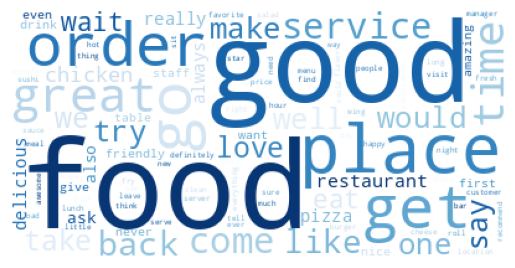

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      colormap='Blues')
wordcloud.generate_from_frequencies(word_cloud_frecventa)
plt.imshow(wordcloud)
plt.axis('off');

### Wordcloud Negative top 20

In [ ]:
# DTM doar cu recenziile negative
dtm_neg = dtm[reviews['negative']==1].copy()
dtm_neg.shape

(2839, 6000)

In [ ]:
# Frecventa cuvintelor din recenziile negative
word_cloud_frecventa_neg = dtm_neg.sum(axis=0)
word_cloud_frecventa_neg

,0
aaabar,0
aaron,1
abacus,1
abide,2
ability,4
...,...
zoe,5
zone,1
zucchini,9
zuchinni,0
